In [2]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.ndimage as ndi
import seaborn as sns
import pyfftw
import pyfftw.interfaces.numpy_fft as fft
from pyem import star
from pyem import mrc
from pyem import geom
from pyem import vop
from pyem import ctf
from skimage import io
from PIL import Image
sns.set()
%matplotlib inline

In [3]:
file1 = '/Users/amazonrf/Desktop/data_1109/20201119_yangzi/GVPP_#2_p4_19kx_I51.24_exp1.tif'
# file2 = '/Users/amazonrf/Desktop/data_1109/20201119_yangzi/GVPP_#2_p4_19kx_I51.24_cool6.tif'
im1 = Image.open(file1)
# im2 = Image.open(file2)
imarray1 = np.array(im1)
# imarray2 = np.array(im2)
# del file1,file2,im1, im2
# plt.imshow(imarray1[1916:1916+160,1930:1930+160],'gray')
# plt.grid(None)
# im = Image.fromarray(imarray1[1916:1916+160,1930:1930+160].astype(np.uint8))
# im.save('/Users/amazonrf/Desktop/data_1109/20201119_yangzi/GVPP_#2_p4_19kx_I51.24_cool6_cut.tif')

In [4]:
def read_norm(file):
    im = Image.open(file)
    im = np.array(im)

    # im = Image.fromarray(im[1916:1916+160,1930:1930+160].astype(np.uint8))
    # im.save(file[0:-4]+'_cut.tif')
    return im

In [5]:

file_exp1 = '/Users/amazonrf/Desktop/data_1109/20201119_yangzi/GVPP_#2_p4_19kx_I51.24_exp1.tif'
file_exp2 = '/Users/amazonrf/Desktop/data_1109/20201119_yangzi/GVPP_#2_p4_19kx_I51.24_exp2.tif'
file_exp3 = '/Users/amazonrf/Desktop/data_1109/20201119_yangzi/GVPP_#2_p4_19kx_I51.24_exp3.tif'
file_exp4 = '/Users/amazonrf/Desktop/data_1109/20201119_yangzi/GVPP_#2_p4_19kx_I51.24_exp4.tif'

file_cool_1 = '/Users/amazonrf/Desktop/data_1109/20201119_yangzi/GVPP_#2_p4_19kx_I51.24_cool1.tif'
file_cool_2= '/Users/amazonrf/Desktop/data_1109/20201119_yangzi/GVPP_#2_p4_19kx_I51.24_cool2.tif'
file_cool_3 = '/Users/amazonrf/Desktop/data_1109/20201119_yangzi/GVPP_#2_p4_19kx_I51.24_cool3.tif'
file_cool_4 = '/Users/amazonrf/Desktop/data_1109/20201119_yangzi/GVPP_#2_p4_19kx_I51.24_cool4.tif'
file_cool_5 = '/Users/amazonrf/Desktop/data_1109/20201119_yangzi/GVPP_#2_p4_19kx_I51.24_cool5.tif'
file_cool_6 = '/Users/amazonrf/Desktop/data_1109/20201119_yangzi/GVPP_#2_p4_19kx_I51.24_cool6.tif'
file_cool_7 = '/Users/amazonrf/Desktop/data_1109/20201119_yangzi/GVPP_#2_p4_19kx_I51.24_cool7.tif'
file_cool_8 = '/Users/amazonrf/Desktop/data_1109/20201119_yangzi/GVPP_#2_p4_19kx_I51.24_cool8.tif'
file_cool_9 = '/Users/amazonrf/Desktop/data_1109/20201119_yangzi/GVPP_#2_p4_19kx_I51.24_cool9.tif'
file_cool_10 = '/Users/amazonrf/Desktop/data_1109/20201119_yangzi/GVPP_#2_p4_19kx_I51.24_cool10.tif'
file_cool_11 = '/Users/amazonrf/Desktop/data_1109/20201119_yangzi/GVPP_#2_p4_19kx_I51.24_cool11.tif'
file_cool_12 = '/Users/amazonrf/Desktop/data_1109/20201119_yangzi/GVPP_#2_p4_19kx_I51.24_cool12.tif'
file_cool_13 = '/Users/amazonrf/Desktop/data_1109/20201119_yangzi/GVPP_#2_p4_19kx_I51.24_cool13.tif'

name_list = [file_exp1,file_exp2,file_exp3,file_exp4,file_cool_1,file_cool_2,file_cool_3,file_cool_4,file_cool_5,file_cool_6,file_cool_7,file_cool_8,file_cool_9,file_cool_10,file_cool_11,file_cool_12,file_cool_13]

im_array_list = []
for name in name_list:
    im_array_list.append(read_norm(name))

In [8]:

def nxcor(img):
    template = imarray1[1550:1700,3130:3280]
    # img = imarrayt
    imgf = fft.rfft2(fft.fftshift(img))
    tpad = np.pad(template,
                [(img.shape[0] - template.shape[0]) // 2,
                (img.shape[1] - template.shape[1]) // 2],
                mode='constant')
    tpadf = fft.rfft2(fft.fftshift(tpad))
    nxcor = fft.fftshift(fft.irfft2( imgf * tpadf.conj() /
                                (np.abs(imgf) * np.abs(tpadf)) ))

    return np.unravel_index(np.argmax(nxcor), nxcor.shape)

def filter_(imarray):
    imarray_f = fft.fftshift(fft.fft2(imarray))
    imarray_f_show = np.log(np.abs(imarray_f))

    l = imarray_f.shape[0]
    filter_x = np.linspace(-1,1,l)
    filter_xx,filter_yy = np.meshgrid(filter_x,filter_x)

    filter_ = filter_xx**2+ filter_yy**2
    filter_[filter_>=0.3**2] = 0
    filter_[filter_ != 0] =1


    imarray_f_filter = imarray_f * filter_
    imarray_filter = fft.irfft2(fft.fftshift(imarray_f_filter)[:,0:l//2+1])

    return imarray_filter
###
images_new = np.zeros([17,4096,4096])
num = 0

images_new2 = np.zeros([17,160,160])

for im in im_array_list:
    move = nxcor(im)
    
    x = move[0]-1615
    y = move[1]-3205

    im = filter_(im)
    print(x,y)
    images_new[num,0:4096-x,0:4096-y] = im[x:,y:]
    im = Image.fromarray(images_new[num,1916:1916+160,1930:1930+160].astype(np.uint8))
    im.save('/Users/amazonrf/Desktop/data_1109/20201119_yangzi/'+str(num)+'_cut.tif')
    images_new2[num,:,:] = im
    num = num+1  

10 0
4 2
6 1
0 2
4 5
7 9
4 5
12 12
14 12
16 13
18 14
22 14
23 14
25 15
27 15
30 16
30 16


[187.44961557336822, 192.935220022902, 185.69998364141992, 185.34622934729265, 185.3973499100278, 190.23221004416817, 185.3973499100278, 188.9700637984623, 186.50875184034027, 188.56208081138558, 184.3154752167512, 185.466955668248, 185.20014722722067, 189.08751840340258, 185.13773924423361, 186.97578930148862, 184.84475707508588]
[179.10841932107073, 187.1336174667265, 180.34335277403918, 179.7876476745925, 180.21990429190967, 185.19223867205025, 180.21990429190967, 184.12913114999253, 179.41490952594586, 182.14124420517422, 180.15178704949903, 179.63436518618215, 179.69208912815913, 184.5754448930761, 180.43853746074473, 181.8228652609541, 180.49050396291312]


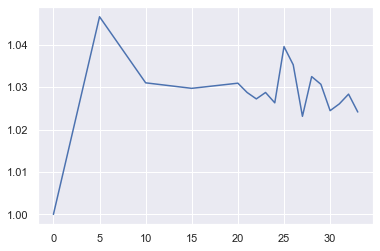

In [9]:
mask_fil = '/Users/amazonrf/Desktop/data_1109/20201119_yangzi/mask.tif'
mask_ = Image.open(mask_fil)
mask =  np.array(mask_)
mask[mask == 255] = 1

mask1 = mask.copy()
s1 = np.sum(mask1)
mask2 = 1 - mask.copy()
s2 = np.sum(mask2)

res1 = []
res2 = []
res = []

res.append(1)
for im in images_new2:
    r1 = np.sum(im*mask1)/s1
    res1.append(r1)

    r2 = np.sum(im*mask2)/s2
    res2.append(r2)

    res.append((r1/r2))

t = [0,5,10,15,20,21,22,23,24,25,26,27,28,29,30,31,32,33]
plt.plot(t, res)

print(res1)
print(res2)

In [103]:
plt.plot(res1/res2)

TypeError: unsupported operand type(s) for /: 'list' and 'list'

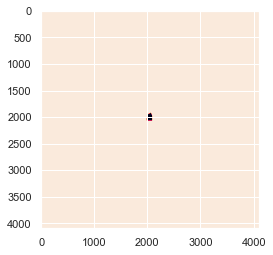

In [99]:
#全图mask，不可行

mask_tot1 = np.zeros([4096,4096])
mask_tot1[1916:1916+160,1930:1930+160] = mask1
s1_t = np.sum(mask_tot1)

mask_tot2 = np.ones([4096,4096])
mask_tot2[1916:1916+160,1930:1930+160] = mask2
s2_t = np.sum(mask_tot2)

plt.imshow(mask_tot2)

res_t = []
res_t.append(0)
for im2 in images_new:
    rr1 = np.sum(im2*mask_tot1)/s1_t
    rr2 = np.sum(im2*mask_tot2)/s2_t

    res_t.append((rr1-rr2)/r2)

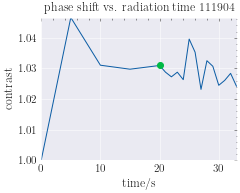

In [10]:
plt.style.use('science')  
plt.plot(t,res) 
plt.plot(t[4],res[4],'o')
# ax.plot(t, res, label='1126_P3')   
plt.xlabel(u"time/s")# plots an axis lable
plt.ylabel(u"contrast")      
# plt.legend((u"p3"),loc='best')      
plt.autoscale(tight=True) 
plt.title(u"phase shift vs. radiation time 111904 ")        
plt.savefig('fig3.jpg', dpi=300,transparent = True)

In [13]:
np.sqrt(0.5)*2

1.4142135623730951